# keras CNN model

1. image dataset load
2. image 전처리 : 실수형변환, 정규화, onehotencoding
3. keras model obj
4. model test
5. model history check

In [1]:
# 패키지 설치

import tensorflow as tf # ver2.0
from tensorflow.keras.datasets.cifar10 import load_data # dataset
from tensorflow.keras.utils import to_categorical # onehotencoding
from tensorflow.keras import Sequential # model
from tensorflow.keras.layers import Conv2D, MaxPooling2D # Conv
from tensorflow.keras.layers import Dense, Flatten, Dropout # DNN



In [2]:


# 1. dataset load
(x_train,y_train),(x_val,y_val) = load_data()
x_train.shape # (50000, 32, 32, 3)
y_train.shape # (50000, 1)


# image 전처리 (x변수) : 실수형 -> 정규화
x_train[0] # 0 ~ 255 : 정규화 x, 정수형

x_train = x_train.astype('float32') # 실수변환
x_train = x_train/255 # 정규화

x_val = x_val.astype('float32') # 실수변환
x_val = x_val/255 # 정규화


# label 전처리 (y변수) : one-hot-encoding
y_train # 10진수 정수

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)




# 2. keras CNN model layer
model = Sequential()

input_shape = (32,32,3)


# Conv layer 1 : [5,5,3,32] 
# Conv2D(feature_map = 32, kernel size = (5,5), input_shape = (h,w,color), activation='relu')
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape,
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))


# Conv layer 2 : [5,5,3,64]
model.add(Conv2D(64, kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))


# Flatten : 3d -> 1d
model.add(Flatten())


# DNN hidden layer 
model.add(Dense(64,activation='relu'))

# DNN output layer
model.add(Dense(10, activation='softmax'))





# 3. model compile : 학습환경 설정
model.compile(optimizer='adam', # 최적화 알고리즘(Lr 생략)
              loss='categorical_crossentropy', # 손실
              metrics=['accuracy']) # 평가방법

# layer 확인 : model info check
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [3]:


# 4. model training 
model_fit = model.fit(x=x_train, y=y_train, # 학습용
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val)) # 평가용



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 437us/sample - loss: 1.6641 - accuracy: 0.3877 - val_loss: 1.3840 - val_accuracy: 0.4966
Epoch 2/10
50000/50000 [==============================] - 21s 419us/sample - loss: 1.3294 - accuracy: 0.5247 - val_loss: 1.2055 - val_accuracy: 0.5787
Epoch 3/10
50000/50000 [==============================] - 21s 426us/sample - loss: 1.1939 - accuracy: 0.5774 - val_loss: 1.1000 - val_accuracy: 0.6097
Epoch 4/10
50000/50000 [==============================] - 22s 445us/sample - loss: 1.1126 - accuracy: 0.6090 - val_loss: 1.0365 - val_accuracy: 0.6381
Epoch 5/10
50000/50000 [==============================] - 22s 444us/sample - loss: 1.0419 - accuracy: 0.6351 - val_loss: 0.9872 - val_accuracy: 0.6544
Epoch 6/10
50000/50000 [==============================] - 22s 443us/sample - loss: 0.9990 - accuracy: 0.6510 - val_loss: 0.9787 - val_accuracy: 0.6557
Epoch 7/10
50000/50000 [====================

In [4]:

# 5. model evaluation : 모델 검증
loss, acc = model.evaluate(x_val, y_val) 
print("loss={:.6f}, accuracy={:.6f}".format(loss,acc))
# loss=0.803209, accuracy=0.726700


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss=0.866669, accuracy=0.699600


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


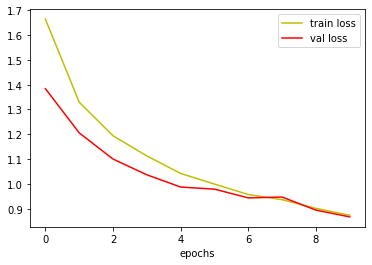

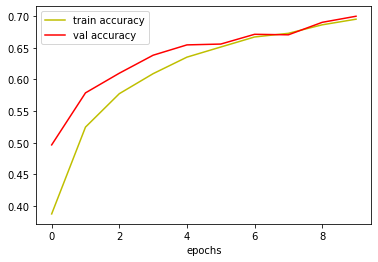

In [5]:


# 6. model history
print(model_fit.history.keys())



train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']


import matplotlib.pyplot as plt

# train vs val loss
plt.plot(train_loss, c='y', label='train loss')
plt.plot(val_loss, c='r', label='val loss')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.show()

# train vs val accuracy
plt.plot(train_acc, c='y', label='train accuracy')
plt.plot(val_acc, c='r', label='val accuracy')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.show()




In [6]:


# 7. model test (new dataset)
from sklearn.metrics import classification_report # f1 score
import numpy as np


labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


idx = np.random.choice(a=x_val.shape[0], size=100, replace=False)
x_test = x_val[idx] # new dataset
x_test.shape # (100, 32, 32, 3)
y_test = y_val[idx]

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, 1)
y_true = np.argmax(y_test, 1)



report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.56      0.83      0.67         6
           2       0.67      0.50      0.57         8
           3       0.67      0.25      0.36         8
           4       0.57      0.80      0.67         5
           5       0.50      0.89      0.64         9
           6       0.33      0.33      0.33         3
           7       0.90      0.75      0.82        12
           8       0.94      0.89      0.92        19
           9       0.86      0.71      0.77        17

    accuracy                           0.73       100
   macro avg       0.68      0.68      0.66       100
weighted avg       0.76      0.73      0.73       100



In [7]:

# 성공여부
cnt = 0
for i in range(100):
    if y_true[i] == y_pred[i]:
        print("success:", labels[y_true[i]])
    else:
        print("fail:real({}) -> pred({})".format(labels[y_true[i]], labels[y_pred[i]]))
        cnt += 1


fail:real(bird) -> pred(airplane)
success: airplane
success: ship
fail:real(truck) -> pred(automobile)
success: horse
success: bird
success: ship
success: airplane
success: horse
success: truck
fail:real(horse) -> pred(dog)
success: ship
success: frog
success: horse
fail:real(ship) -> pred(airplane)
success: dog
fail:real(bird) -> pred(dog)
success: automobile
fail:real(deer) -> pred(horse)
success: automobile
success: dog
success: bird
fail:real(truck) -> pred(automobile)
success: truck
fail:real(bird) -> pred(dog)
success: truck
success: truck
success: airplane
success: horse
success: ship
success: ship
fail:real(cat) -> pred(dog)
success: truck
fail:real(airplane) -> pred(automobile)
success: ship
success: ship
success: horse
success: truck
fail:real(truck) -> pred(bird)
fail:real(automobile) -> pred(truck)
success: deer
success: ship
success: truck
success: airplane
success: airplane
success: truck
success: horse
success: airplane
success: dog
fail:real(dog) -> pred(cat)
success: s